# Definitions and importing data

In [38]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [39]:
class Movie():
    """ Object used to hold a Movie and its properties. """
    def __init__(self, idx, name, genres):
        self.idx = idx
        self.name = name
        self.genres = genres
        self.ratings = []
        self.n_ratings = 0
        self.avg_score = 0
    def add_rating(self, rating):
        """ Update the average rating by taking average * n_ratings = total score. Then add the new rating,
        and then divide by (n_ratings + 1) to get the new average. """
        self.avg_score = (self.avg_score * self.n_ratings + rating) / (self.n_ratings + 1)
        self.n_ratings += 1
        self.ratings.append(rating)
    def __repr__(self):
        return "Movie - Id: {0.idx}, Name: {0.name}, n_ratings = {0.n_ratings}, Avg score = {0.avg_score}".format(self)

In [40]:
# Dictionary that associates each movie ID to its movie object
movies = {}

# Read the list of movies and creates a dictionary of movie objects
with open("./data/movies.txt", "r", encoding="UTF8") as f:
    line = f.readline()
    
    # Split each line by the tab character. The 1st entry is the index, the 2nd entry is the name,
    # the 3rd entries onwards are the genres.
    while line != "":
        line = line.split("\t")
        # Convert the index to an int, convert the genres to a list of ints
        idx, name, genres = int(line[0]), line[1], line[2:]
        movies[idx] = Movie(idx, name, [int(x) for x in genres])
        
        line = f.readline()

In [41]:
# Read the ratings files and convert into a list of 3-tuples
def read_data(filename):
    with open(filename, "r") as f:
        data = f.readlines()
    # Split each line by the tab character and convert to a tuple of ints
    return [tuple(map(int, line.split("\t"))) for line in data]
       
full = read_data("./data/data.txt")

# Extract only the ratings from the full dataset
full_ratings = [datapt[2] for datapt in full]

In [42]:
# Go through the entire rating databast and add all the ratings for each movie
for rating_tuple in full:
    user_idx, movie_idx, rating = rating_tuple
    movies[movie_idx].add_rating(rating)

# Data manipulation and extraction

In [43]:
# Get the top 10 most popular movies by sorting the list of movies by n_ratings
most_pop10 = sorted(list(movies.values()), key=lambda x: x.n_ratings, reverse=True)[:10]
# Movie IDs of these movies
most_pop10_idx = [movie.idx for movie in most_pop10]

# Get the top 10 best movies by sorting the list of movies by avg_score
best10 = sorted(list(movies.values()), key=lambda x: x.avg_score, reverse=True)[:10]
# Movie IDs of these movies
best10_idx = [movie.idx for movie in best10]

In [9]:
# Print how many movies fall in each genre 
for i in range(19):
    print(i, len([movie.idx for movie in list(movies.values()) if movie.genres[i]]))
    
# We decide to use 5, 8 ,16 since they have the most data
# Collect the indices of movies that have these genres into lists
genre5_idx = [movie.idx for movie in list(movies.values()) if movie.genres[5]]
genre8_idx = [movie.idx for movie in list(movies.values()) if movie.genres[8]]
genre16_idx = [movie.idx for movie in list(movies.values()) if movie.genres[16]]

0 2
1 251
2 135
3 42
4 122
5 505
6 109
7 50
8 725
9 22
10 24
11 92
12 56
13 61
14 247
15 101
16 251
17 71
18 27


# Start of Plotting Section

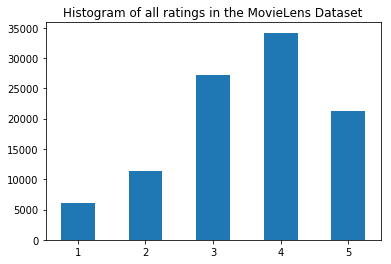

In [34]:
plt.title("Histogram of all ratings in the MovieLens Dataset")
plt.hist(full_ratings, bins=[1, 2, 3, 4, 5, 6], align="left", rwidth=0.5)
plt.savefig("./Visualizations/Fig4-1.png", dpi=300)
plt.show()

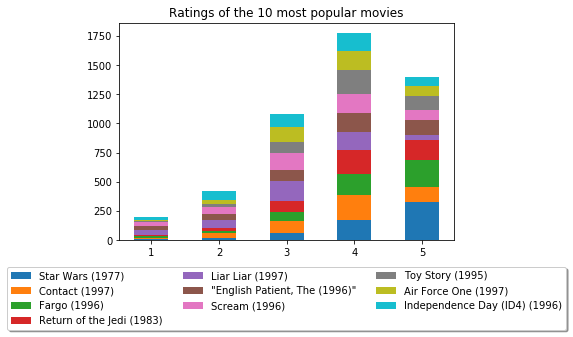

In [33]:
fig = plt.figure()
ax = plt.subplot()

ratings_arr = [movies[i].ratings for i in most_pop10_idx]
labels_arr = [movies[i].name for i in most_pop10_idx]

plt.hist(ratings_arr, bins=[1, 2, 3, 4, 5, 6], align="left", histtype="barstacked", rwidth=0.5, label=labels_arr)

# Put a legend below current axis
lgd = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=3)

ax.set_title("Ratings of the 10 most popular movies")
plt.savefig("./Visualizations/Fig4-2.png", dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

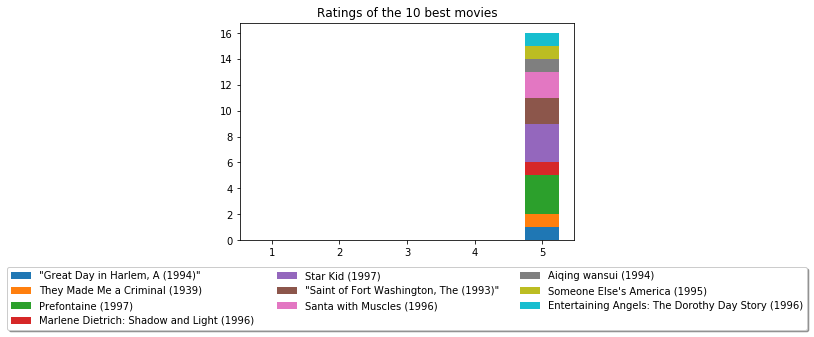

In [31]:
fig = plt.figure()
ax = plt.subplot()

ratings_arr = [movies[i].ratings for i in best10_idx]
labels_arr = [movies[i].name for i in best10_idx]

plt.hist(ratings_arr, bins=[1, 2, 3, 4, 5, 6], align="left", histtype="barstacked", rwidth=0.5, label=labels_arr)

# Put a legend below current axis
lgd = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=3)

ax.set_title("Ratings of the 10 best movies")
plt.savefig("./Visualizations/Fig4-3.png", dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

Mean =  3.3940734781442745


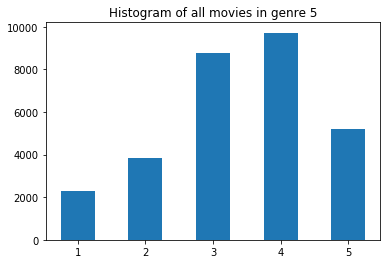

In [35]:
# We use itertools.chain to flatten the list of lists into a single generator, then list() to convert to list
genre5_scores = list(itertools.chain(*[movies[i].ratings for i in genre5_idx]))
print("Mean = ", np.mean(genre5_scores))

plt.title("Histogram of all movies in genre 5")
plt.hist(genre5_scores, bins=[1, 2, 3, 4, 5, 6], align="left", rwidth=0.5)
plt.savefig("./Visualizations/Fig4-4-1.png", dpi=300)
plt.show()

Mean =  3.6873793708484772


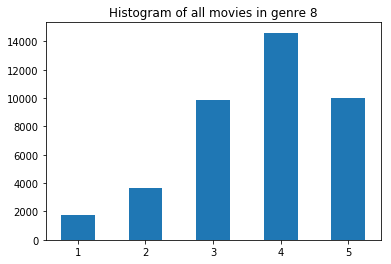

In [36]:
# We use itertools.chain to flatten the list of lists into a single generator, then list() to convert to list
genre8_scores = list(itertools.chain(*[movies[i].ratings for i in genre8_idx]))
print("Mean = ", np.mean(genre8_scores))

plt.title("Histogram of all movies in genre 8")
plt.hist(genre8_scores, bins=[1, 2, 3, 4, 5, 6], align="left", rwidth=0.5)
plt.savefig("./Visualizations/Fig4-4-2.png", dpi=300)
plt.show()

Mean =  3.5090069495245064


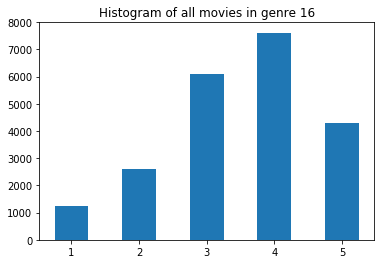

In [37]:
# We use itertools.chain to flatten the list of lists into a single generator, then list() to convert to list
genre16_scores = list(itertools.chain(*[movies[i].ratings for i in genre16_idx]))
print("Mean = ", np.mean(genre16_scores))

plt.title("Histogram of all movies in genre 16")
plt.hist(genre16_scores, bins=[1, 2, 3, 4, 5, 6], align="left", rwidth=0.5)
plt.savefig("./Visualizations/Fig4-4-3.png", dpi=300)
plt.show()